In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [4]:
data_raw = pd.read_excel(u"RawData.xlsx", index_col=0, na_values='NA')
data_raw.head()

,№№ скважин,Пласт,Фация,"Верх интервала отбора, м","Низ интервала отбора, м","Вынос керна,м","Место взятия от верха, м",Лабораторный номер образца,Краткая литологическая характеристика,"Открытая пористость по воде, %",...,"Газопроницаемость перпендикулярно напластованию, мД","Эффективная проницаемость, мД","Водоудерживающая способность, %","Остаточная водонасыщенность, %","Объемная плотность, г/см3","Кажущаяся минералогическая плотность, г/см3","Потеря веса, %","Глубина отбора образца после привязки к ГИС, м","Смещение, м",Примечание
№ п/п,,,,,,,,,,,,,,,,,,,,,
0,1,МО10-0,NaN,2465.0,2472.0,7.0,0.17,46542-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.510000,2.698925,NaN,2464.97,0.2,кусок
1,1,МО10-0,NaN,2465.0,2472.0,7.0,2.34,46541-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.490000,2.697725,NaN,2467.14,0.2,кусок
2,1,МО10-0,NaN,2465.0,2472.0,7.0,2.58,46540-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.480000,2.672414,NaN,2467.38,0.2,кусок
3,1,МО10-0,NaN,2465.0,2472.0,7.0,2.68,46539-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.480000,2.689805,NaN,2467.48,0.2,кусок
4,1,МО12.1,мелководье,2465.0,2472.0,7.0,3.30,46538-08,"Песчаник мелкозернистый, карбонатный, неравном...",9.031357,...,NaN,NaN,95.604445,NaN,2.440524,2.682819,NaN,2468.10,0.2,NaN


In [5]:
numerical_columns=['Верх интервала отбора, м','Низ интервала отбора, м',
                          'Вынос керна,м', 'Место взятия от верха, м ', 
                          'Открытая пористость по воде, %', 'Открытая пористость по керосину,%',
                          'Эффективная пористость ,%', 'Газопроницаемость параллельно напластованию , мД',
                          'Газопроницаемость перпендикулярно напластованию, мД',
                          'Эффективная проницаемость, мД', 'Водоудерживающая способность, %',
                          'Остаточная водонасыщенность, %', 'Объемная плотность, г/см3',
                          'Кажущаяся минералогическая плотность, г/см3', 'Потеря веса, %',
                          'Глубина отбора образца после привязки к ГИС, м', 'Смещение, м']

In [6]:
work_data = data_raw[numerical_columns]

In [7]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10310 entries, 0 to 10309
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Верх интервала отбора, м                             10310 non-null  float64
 1   Низ интервала отбора, м                              10310 non-null  float64
 2   Вынос керна,м                                        10310 non-null  float64
 3   Место взятия от верха, м                             10310 non-null  float64
 4   Открытая пористость по воде, %                       7865 non-null   float64
 5   Открытая пористость по керосину,%                    2861 non-null   float64
 6   Эффективная пористость ,%                            6995 non-null   float64
 7   Газопроницаемость параллельно напластованию , мД     7148 non-null   float64
 8   Газопроницаемость перпендикулярно напластованию, мД  1082 non-null

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


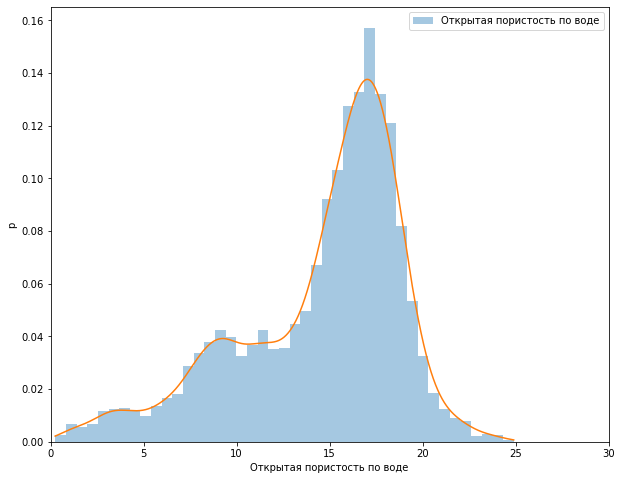

In [8]:
plt.figure(figsize=(10, 8))

df_wd_kpow = work_data['Открытая пористость по воде, %'].dropna()

kernel = scipy.stats.gaussian_kde(df_wd_kpow)

min_amount = df_wd_kpow.min() 
max_amount = df_wd_kpow.max()
x = np.linspace(min_amount, max_amount, len(df_wd_kpow))
kde_values = kernel(x)

sns.distplot(df_wd_kpow, 
             kde=False, norm_hist=True, label=f'Открытая пористость по воде')
plt.plot(x, kde_values)

plt.ylabel('p')
plt.xlabel('Открытая пористость по воде')
plt.xlim(0, 30)
plt.legend()
plt.show()

In [9]:
params_genlog = scipy.stats.genlogistic.fit(df_wd_kpow)
params_genlog

(0.2114928786929056, 18.612796633012167, 0.9210130439294185)

In [10]:
params_log = scipy.stats.logistic.fit(df_wd_kpow)
params_log

(15.06179785029985, 2.441757777016855)

In [11]:
def f(x, params_1):
    return scipy.stats.genlogistic.pdf(x, *params_1)

In [12]:
def g(x, params_2):
    return scipy.stats.logistic.pdf(x, *params_2)

In [13]:
NORM_CONST = 0.83

Text(0, 0.5, 't(x)')

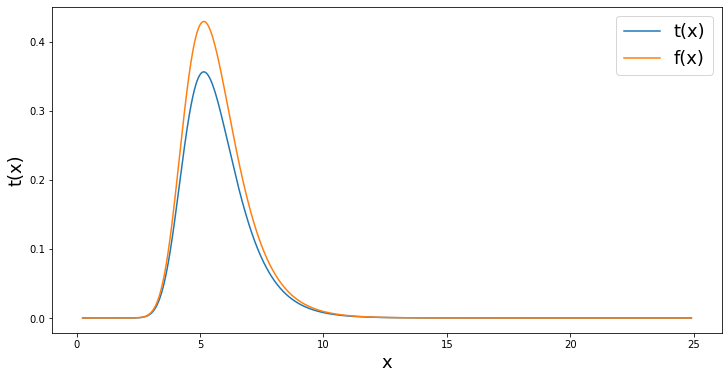

In [14]:
x_vals = np.linspace(df_wd_kpow.min(), df_wd_kpow.max(), len(df_wd_kpow))

f_vals = [f(x, params_log) for x in x_vals]
p_vals = [f/NORM_CONST for f in f_vals]


plt.figure(figsize=(12,6))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['t(x)', 'f(x)'], fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.ylabel('t(x)', fontsize = 18)

In [15]:
params_genlog

(0.2114928786929056, 18.612796633012167, 0.9210130439294185)

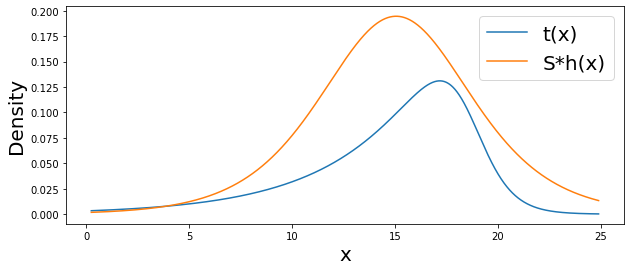

In [16]:
x_vals = np.linspace(df_wd_kpow.min(), df_wd_kpow.max(), len(df_wd_kpow))
f_vals = [f(x, params_genlog) for x in x_vals]
g_vals = g(x_vals, params_log)
M = 1.9

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)

In [17]:
samples = []

N = 100000

candidate_full = scipy.stats.logistic.rvs(*params_log, size = N)
for i in range(N):
    candidate = candidate_full[i]
    
    prob_accept = f(candidate, params_genlog) / (M*g(candidate, params_log))
    
    if np.random.uniform() < prob_accept:
        samples.append(candidate)

(0.0, 30.0)

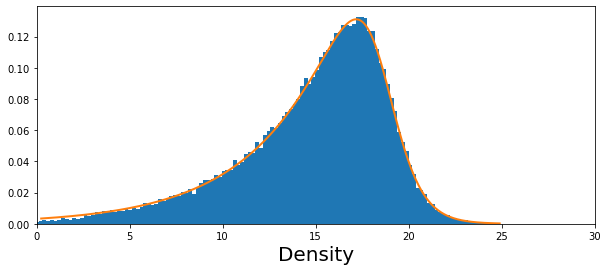

In [18]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f for f in f_vals], linewidth=2)
plt.xlim(0,30)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


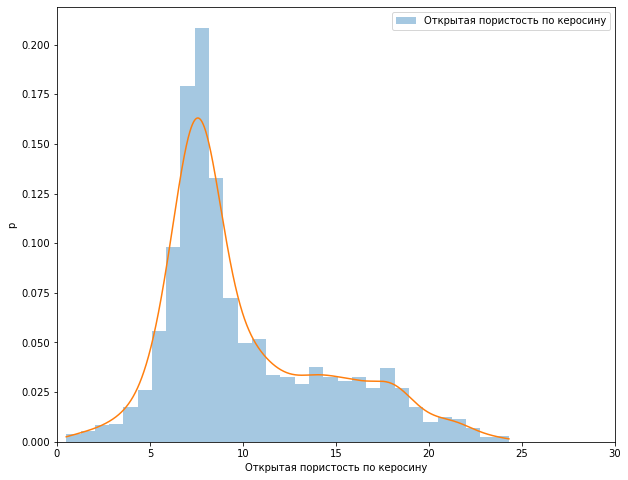

In [22]:
plt.figure(figsize=(10, 8))

df_wd_kpo = work_data['Открытая пористость по керосину,%'].dropna()

kernel = scipy.stats.gaussian_kde(df_wd_kpo)

min_amount = df_wd_kpo.min() 
max_amount = df_wd_kpo.max()
x = np.linspace(min_amount, max_amount, len(df_wd_kpo))
kde_values = kernel(x)

sns.distplot(df_wd_kpo, 
             kde=False, norm_hist=True, label=f'Открытая пористость по керосину')
plt.plot(x, kde_values)

plt.ylabel('p')
plt.xlabel('Открытая пористость по керосину')
plt.xlim(0, 30)
plt.legend()
plt.show()

In [23]:
params_lognorm = scipy.stats.lognorm.fit(df_wd_kpo)
params_lognorm

(0.34355936017297384, -2.360952205779398, 11.668133835272602)

In [24]:
params_log = scipy.stats.logistic.fit(df_wd_kpo)
params_log

(9.441778588395717, 2.455665133531348)

In [25]:
def f(x, params_1):
    return scipy.stats.lognorm.pdf(x, *params_1)

In [26]:
def g(x, params_2):
    return scipy.stats.logistic.pdf(x, *params_2)

In [27]:
NORM_CONST = 0.9

Text(0, 0.5, 't(x)')

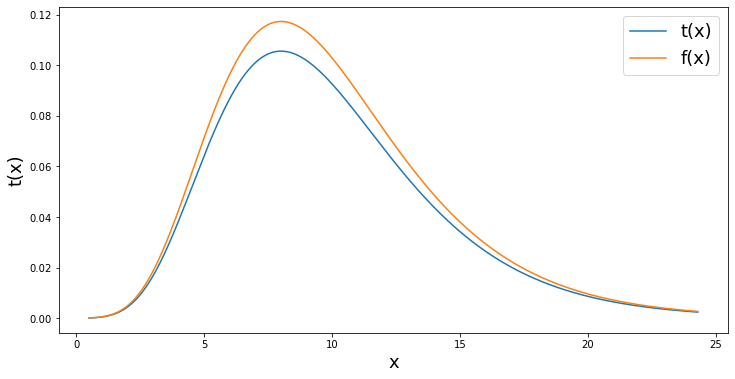

In [28]:
x_vals = np.linspace(df_wd_kpo.min(), df_wd_kpo.max(), len(df_wd_kpo))

f_vals = [f(x, params_lognorm) for x in x_vals]
p_vals = [f/NORM_CONST for f in f_vals]


plt.figure(figsize=(12,6))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['t(x)', 'f(x)'], fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.ylabel('t(x)', fontsize = 18)

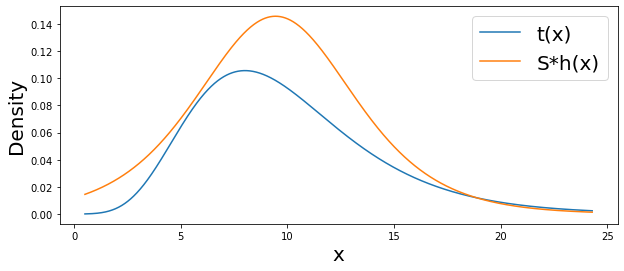

In [29]:
x_vals = np.linspace(df_wd_kpo.min(), df_wd_kpo.max(), len(df_wd_kpo))
f_vals = [f(x, params_lognorm) for x in x_vals]
g_vals = g(x_vals, params_log)
M = 1.43

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)

In [30]:
samples = []

N = 100000

candidate_full = scipy.stats.logistic.rvs(*params_log, size = N)
for i in range(N):
    candidate = candidate_full[i]
    
    prob_accept = f(candidate, params_lognorm) / (M*g(candidate, params_log))
    
    if np.random.uniform() < prob_accept:
        samples.append(candidate)

(0.0, 40.0)

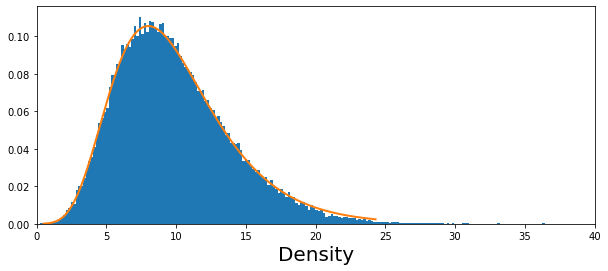

In [33]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f for f in f_vals], linewidth=2)
plt.xlim(0,40)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


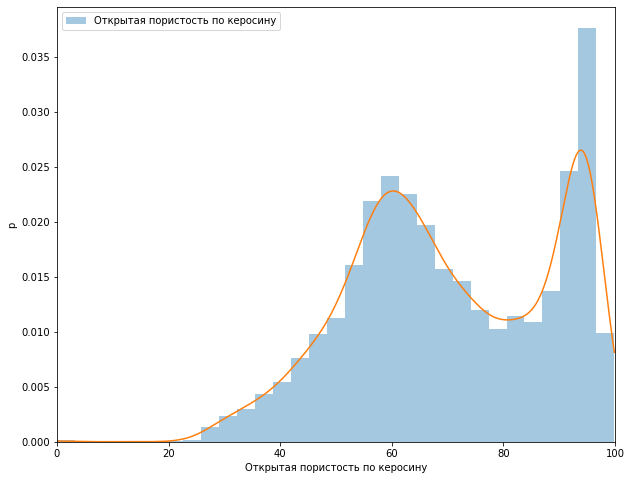

In [36]:
plt.figure(figsize=(10, 8))

df_wd_ws = work_data['Водоудерживающая способность, %'].dropna()

kernel = scipy.stats.gaussian_kde(df_wd_ws)

x = np.linspace(df_wd_ws.min(), df_wd_ws.max(), len(df_wd_ws))
kde_values = kernel(x)

sns.distplot(df_wd_ws, 
             kde=False, norm_hist=True, label=f'Открытая пористость по керосину')
plt.plot(x, kde_values)

plt.ylabel('p')
plt.xlabel('Открытая пористость по керосину')
plt.xlim(0, 100)
plt.legend()
plt.show()

In [37]:
params_dw = scipy.stats.dweibull.fit(df_wd_ws)
params_dw

(1.6524845403394588, 72.3995648818528, 17.413544315266606)

In [38]:
params_dg = scipy.stats.dgamma.fit(df_wd_ws)
params_dg

(1.9335510531015623, 72.39891314408521, 8.129543765559234)

In [39]:
def f(x, params_1):
    return scipy.stats.dweibull.pdf(x, *params_1)

In [40]:
def g(x, params_2):
    return scipy.stats.dgamma.pdf(x, *params_2)

In [41]:
NORM_CONST = 0.9

Text(0, 0.5, 't(x)')

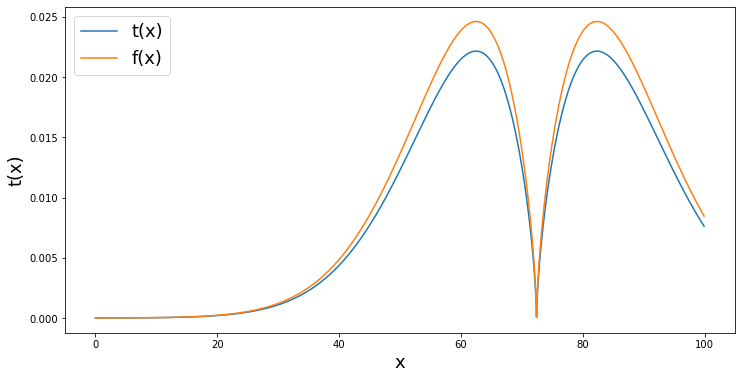

In [42]:
x_vals = np.linspace(df_wd_ws.min(), df_wd_ws.max(), len(df_wd_ws))

f_vals = [f(x, params_dw) for x in x_vals]
p_vals = [f/NORM_CONST for f in f_vals]


plt.figure(figsize=(12,6))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['t(x)', 'f(x)'], fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.ylabel('t(x)', fontsize = 18)

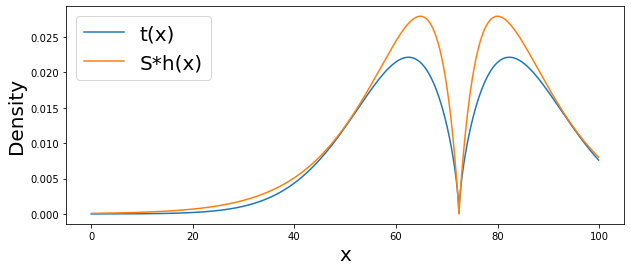

In [45]:
x_vals = np.linspace(df_wd_ws.min(), df_wd_ws.max(), len(df_wd_ws))
f_vals = [f(x, params_dw) for x in x_vals]
g_vals = g(x_vals, params_dg)
M = 1.2

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)

In [43]:
samples = []

N = 100000

candidate_full = scipy.stats.dgamma.rvs(*params_dg, size = N)
for i in range(N):
    candidate = candidate_full[i]
    
    prob_accept = f(candidate, params_dw) / (M*g(candidate, params_dg))
    
    if np.random.uniform() < prob_accept:
        samples.append(candidate)

(0.0, 100.0)

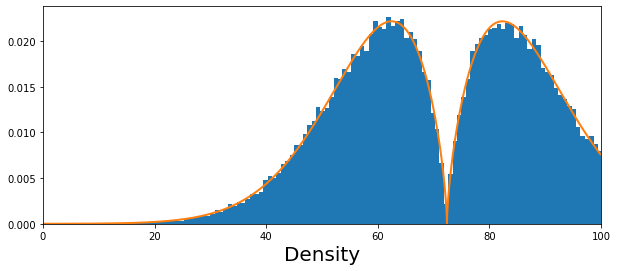

In [46]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f for f in f_vals], linewidth=2)
plt.xlim(0,100)

In [19]:
def inverse_sampl(distribution,data):   
    x_ = np.linspace(0, np.max(data), len(data))
    
    x_1 = np.random.uniform(size = 5000)
    params = distribution.fit(data)
    x = distribution.ppf( x_1 , *params)
    plt.hist(x,density = True, bins = 150)
    plt.plot(x_, distribution.pdf(x_, *params))
    plt.show()

In [20]:
distribution = scipy.stats.genlogistic

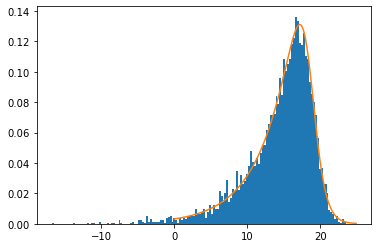

In [21]:
inverse_sampl(distribution,df_wd_kpow)

In [34]:
distribution = scipy.stats.lognorm

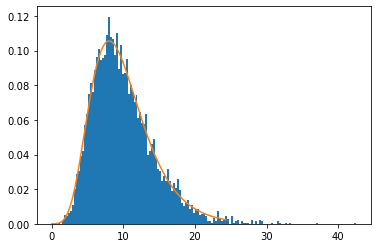

In [35]:
inverse_sampl(distribution,df_wd_kpo)

In [47]:
distribution = scipy.stats.dweibull

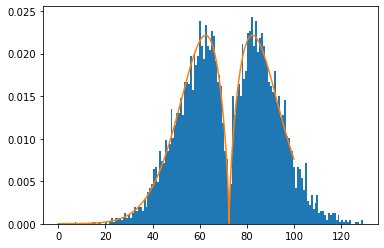

In [48]:
inverse_sampl(distribution,df_wd_ws)